In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,45.510125,5.441648,10.124698,23.150407,12.226230
1,49.221424,31.899902,9.238717,19.472335,23.324026
2,45.359746,12.964709,11.788772,9.252216,19.988895
3,53.505146,18.138992,8.951442,7.549075,21.113903
4,54.149348,4.082794,10.956897,9.553328,13.463865


<Axes: ylabel='Density'>

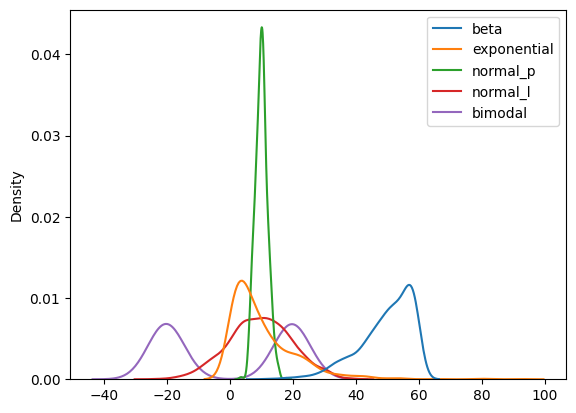

In [5]:
sns.kdeplot(data=df)

In [ ]:
df.describe()

<Axes: ylabel='Density'>

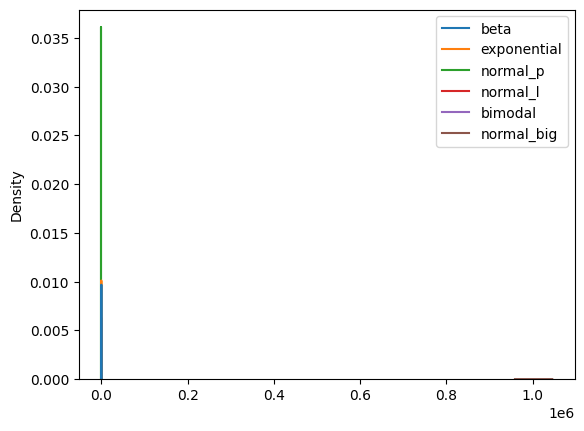

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

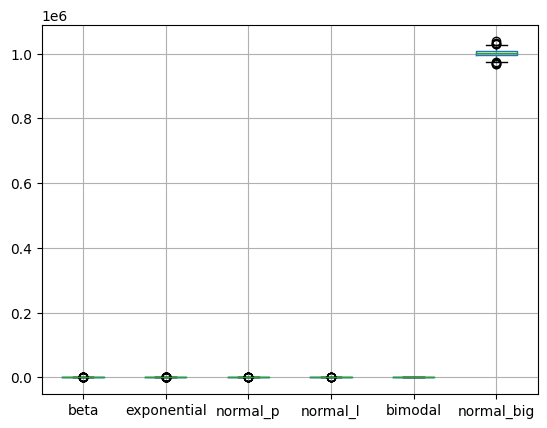

In [7]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [8]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [9]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [10]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.534420,-0.158169,0.039165,1.024052,0.308935,-1.141833
1,-0.208372,2.107757,-0.317177,0.744218,0.584733,0.397393
2,-0.547631,0.486118,0.708457,-0.033345,0.501850,-0.201599
3,0.167964,0.929251,-0.432720,-0.162923,0.529808,0.821260
4,0.224559,-0.274543,0.373876,-0.010436,0.339692,0.310046


<Axes: ylabel='Density'>

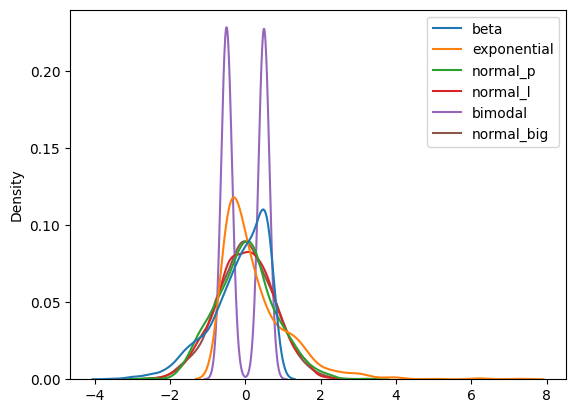

In [11]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [12]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,-0.171099,0.276579,4.585027e-03,-3.222864e-03,0.000156,4.321292e-03
std,0.750938,0.910419,7.882351e-01,7.557154e-01,0.501261,7.584085e-01
min,-3.486845,-0.622404,-2.713335e+00,-2.468445e+00,-0.701058,-2.489297e+00
25%,-0.553481,-0.355448,-5.316089e-01,-4.779548e-01,-0.502173,-4.819073e-01
50%,0.000000,0.000000,-3.572446e-16,-6.757290e-17,0.000000,-4.288616e-15
75%,0.446519,0.644552,4.683911e-01,5.220452e-01,0.497827,5.180927e-01
max,0.737219,7.224669,3.195032e+00,2.161366e+00,0.711831,2.734106e+00


<Axes: >

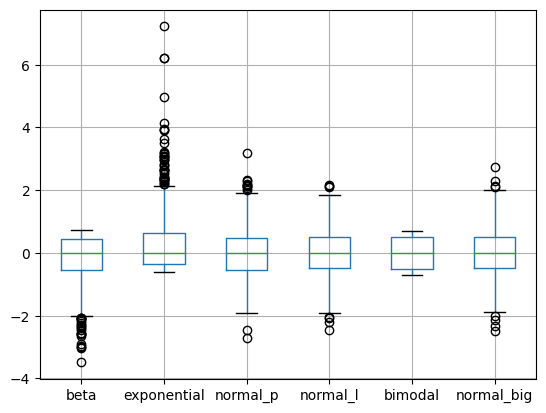

In [13]:
df_s.boxplot()

In [14]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.486845426989766,
 -0.6224044964005275,
 -2.7133352861735336,
 -2.4684454336198365,
 -0.7010582036459834,
 -2.489296972316157]

In [15]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7372192741233209,
 7.224668656335787,
 3.195032062452151,
 2.1613663471837303,
 0.7118314083132194,
 2.734105985913692]

In [16]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.15932629e+01,  7.28852014e+00,  1.00273211e+01,  9.69050082e+00,
       -2.04961233e-01,  1.00051364e+06])